#### Python and Chemistry: Skills: Part 3

# Solving Equations with SymPy
The quadratic equation? We don't need it anymore! We can solve symbolic math directly in python. You don't need to spend thousands of dollars a year for a license to a symbolic math system like Maple, Mathematica or MatLab. We can use free tools available through python. Those expensive programs can do a lot, but python can do enough.

We will use the tools provided by the `sympy` package. It provides functions and methods for manipulating equations that use symbolic variables, i.e. when x is an unknown. We have already introduced python as a calculator and demonstrated graphs by plotting a set of y-values calculated from a set of x-values (see "_Your New Graphing Calculator_").  the `sympy` package allows for more direct display of a plot of a function. We will start with finding the roots of a polynomial. 

## Defining Variables
An unknown variable in `sympy` is represented by a "symbol". Symbols are what make symbolic math waht it is. We represent concepts with symbols and play with them. That's real math, everything else is accounting.

Consider the following code and figure out what each command does. Here we solve the mystery of $x+1=0$. What is x?

In [1]:
import sympy

x = sympy.symbols('x')

## Solving for $x$
We can use the symbol x in an expression and then solvge for x. No algebra needed. Although without some algebra inside you you will never know if the answer is reasonable. 

In [2]:
expr = x + 1
solution_list = sympy.solvers.solve(expr, x)

display(expr)
print("the x intercept(root) for the above expression is...")
print("The list of solutions is:", solution_list)         # The result will be a list of one 
print("The first item in the list is:", solution_list[0]) # Print the item in the zero position in that list.

x + 1

the x intercept(root) for the above expression is...
The list of solutions is: [-1]
The first item in the list is: -1


## Roots of Polynomials
Now let us solve the following equality. At what values of x is the following true?
$$x+5 = 3x^2+2$$ 
First we get everything over to one side so that we have an equation that equals zero and then we can use the quadratic equation. Not! We will just solve the polynomial directly using the `solvers` sublibrary of `sympy`.
$$-3x^2+x+3 = 0$$
First we can define a variable that represents the expression above. 

In [3]:
expr = -3*x**2 + x + 3
display(expr)

-3*x**2 + x + 3

Applying the `solve()` function from the `sympy.solvers` subpackage to the expression will give a list of solutions for the symbol $x$. `sympy` will produce exact solutions. For example $\sqrt{2}$  is not 1.4142135623730951. The decimals never really end. One is exact, the other is approximate, no matter for how long the digits flow.

Observe the code below and infer what the commands do. In the first line we create the list of solutions. In the second line we print the list. In the third line we address the zeroeth item in the list and apply a floating point evaluation. In the fourth line we obtain the floating point approximation of the item in the #1 position in the list.

In [4]:
solution_list = sympy.solvers.solve(expr, x)               # solve the polynomial

print("The two possible solutions are:",solution_list)     # The result is a list of possible exact solutions
display(solution_list[0], solution_list[1])
print("The first evaluates to approx. x =",solution_list[0].evalf()) # item at position #0 in list, floating point
print("The second evaluates to approx. x =",solution_list[1].evalf())  # item at position #1 in list.

The two possible solutions are: [1/6 - sqrt(37)/6, 1/6 + sqrt(37)/6]


1/6 - sqrt(37)/6

1/6 + sqrt(37)/6

The first evaluates to approx. x = -0.847127088383037
The second evaluates to approx. x = 1.18046042171637


## Exploring the Results
If we substitute either of the exact solutions back into the expression it should evaluate to zero. However $\sqrt{37}$ will not evaluate to an exact number. `sympy` will do its best but we see that the evaluation comes very close but not exactly to zero (although $0.0 \times 10^{-124} $ seems pretty close to zero to me). We can expand the substituted expression with the `sympy.expand()` function.  This will apply the rules of algebra to the exact result and calculate the symbolic answer, which is exactly zero.

In [5]:
print("One of the solutions to 0 =", expr,"is...")
print()
should_be_zero = expr.subs(x, solution_list[0])  # substituting a solution into the expression should give zero
display(should_be_zero)
print()
print("and that can be evaluated to x =",should_be_zero.evalf())
print("which reveals the limits of floating point precision.")
print("If we expand (use algebra) rather than evaluate (calculate),")
print("we find that x =",sympy.expand(should_be_zero), "exactly.")

One of the solutions to 0 = -3*x**2 + x + 3 is...



-3*(1/6 - sqrt(37)/6)**2 - sqrt(37)/6 + 19/6


and that can be evaluated to x = 0.e-124
which reveals the limits of floating point precision.
If we expand (use algebra) rather than evaluate (calculate),
we find that x = 0 exactly.


In [6]:
display(should_be_zero)           # Jupyter will "prettyprint" objects with the display() function.

-3*(1/6 - sqrt(37)/6)**2 - sqrt(37)/6 + 19/6

## Plotting the Expression
We can visualize the solutions for the expression by plotting. We can see the roots as x-axis intercepts. Consider the following code blocks. In the first we show how simple it is to get a quick plot. In the second we add features that provide control of the style.

Go back and change the expression to something else. Try $(x+\sqrt{2})^2+9=3x^2+9x$. Execute the code blocks in order and see what happens.

In [7]:
expr = (x + sympy.sqrt(2))**2 + 9 - (3*x**2 + 9*x)
solution_list = sympy.solvers.solve(expr, x)               # solve the polynomial

print("The expression evalueted to zero is...")
display(expr)
print("The exact solutions are...")
display(solution_list[0])
display(solution_list[1])
print("The approximate solutions are...")
print(solution_list[0].round(4))
print(solution_list[1].round(4))

The expression evalueted to zero is...


-3*x**2 - 9*x + (x + sqrt(2))**2 + 9

The exact solutions are...


-9/4 + sqrt(2)/2 + sqrt(177 - 36*sqrt(2))/4

-sqrt(177 - 36*sqrt(2))/4 - 9/4 + sqrt(2)/2

The approximate solutions are...
1.2643
-4.3501


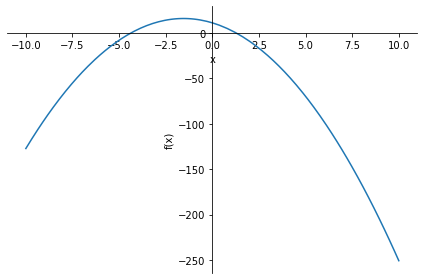

In [8]:
from sympy.plotting import plot

plot(expr)


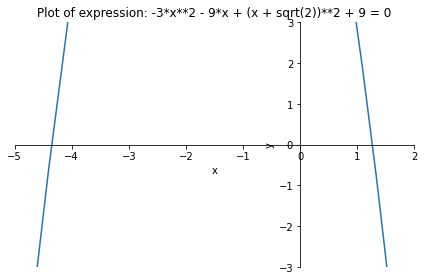

y = 0 at x = 1.26 and x = -4.35


In [9]:
p1 = plot(expr,
          title="Plot of expression: " + str(expr) + " = 0",
          xlabel="x", 
          ylabel="y",
          xlim=[-5,2], 
          ylim=[-3,3],
          xscale='linear', 
          yscale='linear',
          show=False)
p1.show()
print("y = 0 at x =",solution_list[0].evalf().round(2),"and x =",solution_list[1].evalf().round(2))


## Summary
We can define an expression using symbolic math and solve that expression using symbolic algebra. We can obtain exact algebraic solutions and also their floating point estimates. We can solve an expression that equates to zero. We can apply the rules of algebra to expand terms to obtain the exact algebraic solution. There are many other simplification tools within `sympy` to explore.